<span style="font-style:italic; font-size:24px; color:darkslateblue;">
Statistiques descriptives et visualisations
</span>

In [2]:
import numpy as np  # Vectors and matrices
import pandas as pd #Manipulation de données
import matplotlib.pyplot as plt  # Plots
# Enable nice plots
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')

import seaborn as sns # Alternative Plots
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #For normalization 

In [3]:
df_csv = pd.read_csv('goodreads_books_f.csv')

# Renommer la colonne "Premier genre" en "Genres"
df_csv = df_csv.rename(columns={'Premier genre': 'Genres'})
df_csv = df_csv.rename(columns={'Ratings': 'Nombre de lecteurs'})


print(df_csv)

                                 Titre  Année de publication  Pages  \
0    The Invisible Life of Addie LaRue                  2020    448   
1        The House in the Cerulean Sea                  2020    394   
2                    Project Hail Mary                  2021    476   
3                 The Midnight Library                  2020    288   
4                 I'm Glad My Mom Died                  2022    320   
..                                 ...                   ...    ...   
495        Homicidal Psycho Jungle Cat                  1994    176   
496                  One for the Money                  1994    320   
497                          The Beach                  1996    436   
498              We Were the Mulvaneys                  1996    454   
499                         Underworld                  1997    827   

     Nombre de lecteurs  Note moyenne  \
0               1298512          4.18   
1                793548          4.39   
2                745166 

In [6]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Titre                 500 non-null    object 
 1   Année de publication  500 non-null    int64  
 2   Pages                 500 non-null    int64  
 3   Nombre de lecteurs    500 non-null    int64  
 4   Note moyenne          500 non-null    float64
 5   Genres                500 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


In [8]:
#Il n'y a pas des données manquantes

In [10]:
#Nouvelle sauvegarde 
df_csv.to_csv("goodreads_books_f.csv", index=False, encoding="utf-8")

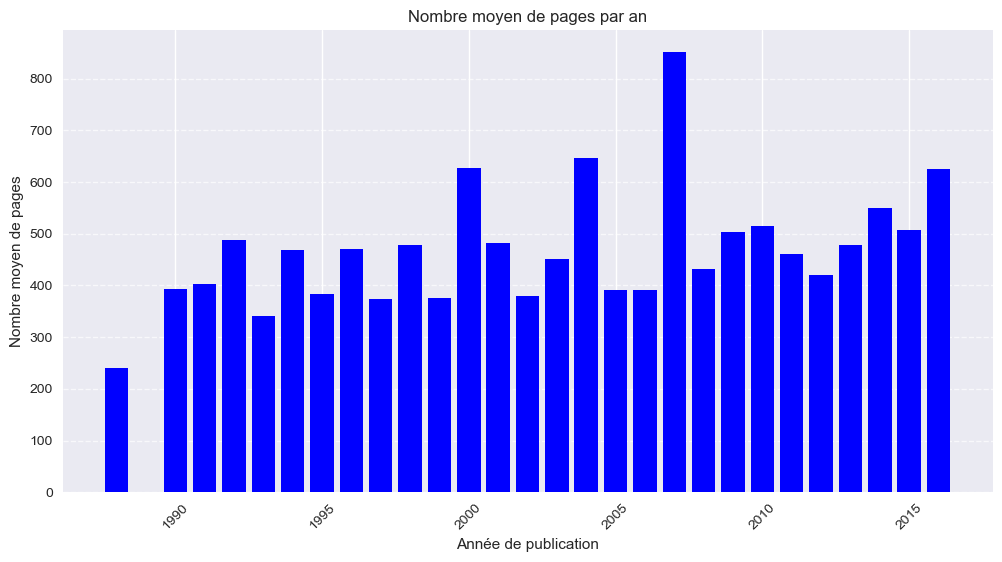

In [12]:
#Diagramme en bâtons pour le nombre moyen de pages par an

# Filtrer les données jusqu'à l'année 2016
df = df_csv[df_csv["Année de publication"] <= 2016]

# Calculer la moyenne du nombre de pages par année
pages_par_an = df.groupby("Année de publication")["Pages"].mean()

# Trier par année croissante
pages_par_an = pages_par_an.sort_index()

# Tracer le diagramme en bâtons
plt.figure(figsize=(12, 6))
plt.bar(pages_par_an.index, pages_par_an.values, color='blue')
plt.xlabel("Année de publication")
plt.ylabel("Nombre moyen de pages")
plt.title("Nombre moyen de pages par an")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("nombredespages.png", dpi=300)
plt.show()

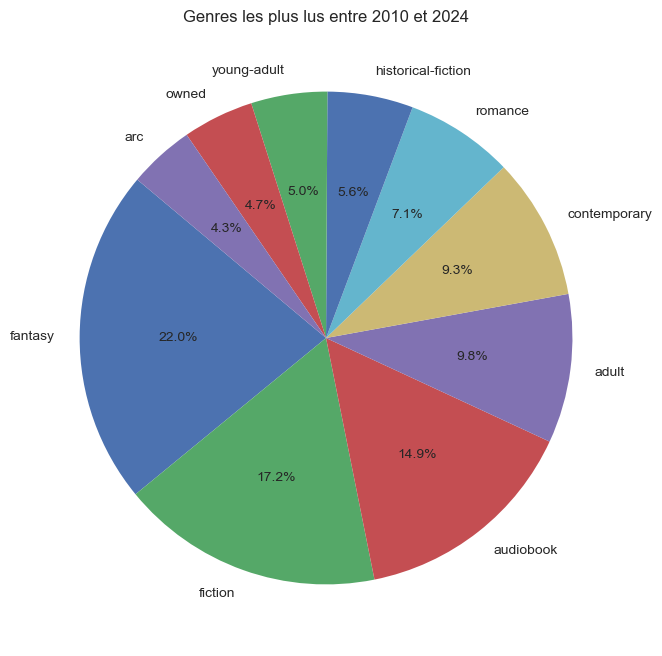

In [13]:
#Pie chart des genres les plus lus entre 2010 et 2024
from collections import Counter

# Filtrer les livres publiés entre 2010 et 2024
df = df_csv[(df_csv['Année de publication'] >= 2010) & (df_csv['Année de publication'] <= 2024)]

# Extraire les genres et les normaliser (tout en minuscules)
genres = []
for genre_list in df['Genres']:
    # Convertir la chaîne de caractères en liste
    genre_list = eval(genre_list)
    # Convertir chaque genre en minuscules pour éviter les doublons
    genres.extend([genre.lower() for genre in genre_list if genre.lower() != "2020" and genre.lower() != "favorites" and genre.lower() != "netgalley"])  # Exclure "2020" et "favorites"

# Compter les occurrences de chaque genre
genre_counts = Counter(genres)

# Convertir en DataFrame pour une manipulation plus facile
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Trier par le nombre d'occurrences
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Afficher les 10 genres les plus populaires
top_genres = genre_df.head(10)

# Créer la pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genres les plus lus entre 2010 et 2024')
plt.savefig("lesgenresdecennie2.png", dpi=300)
plt.show()

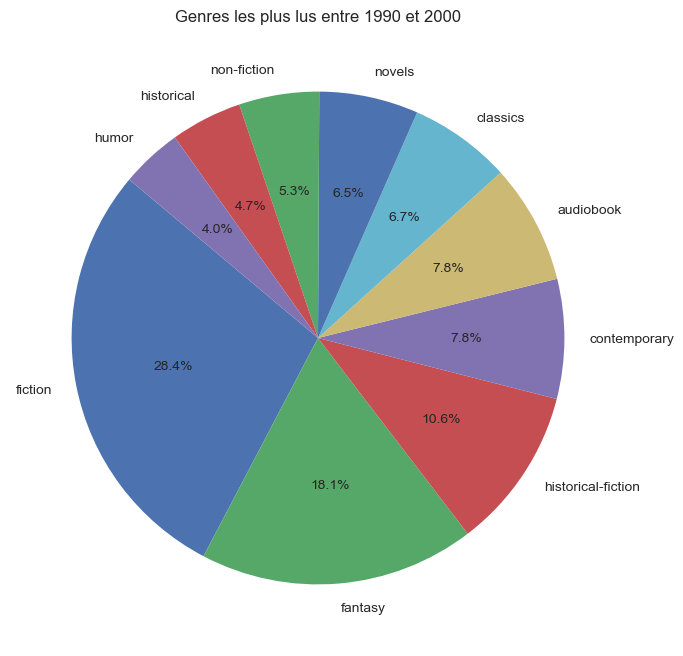

In [15]:
#Pie chart des genres les plus lus entre 1990 et 2000
from collections import Counter

# Filtrer les livres publiés entre 1990 et 2000
df = df_csv[(df_csv['Année de publication'] >= 1990) & (df_csv['Année de publication'] <= 2000)]

# Extraire les genres et les normaliser (tout en minuscules)
genres = []
for genre_list in df['Genres']:
    # Convertir la chaîne de caractères en liste
    genre_list = eval(genre_list)
    # Convertir chaque genre en minuscules pour éviter les doublons
    genres.extend([genre.lower() for genre in genre_list if genre.lower() != "favorites"])

# Compter les occurrences de chaque genre
genre_counts = Counter(genres)

# Convertir en DataFrame pour une manipulation plus facile
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Trier par le nombre d'occurrences
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Afficher les 10 genres les plus populaires
top_genres = genre_df.head(10)

# Créer la pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genres les plus lus entre 1990 et 2000')
plt.savefig("lesgenresdecennie1.png", dpi=300)
plt.show()

In [16]:
import ast

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

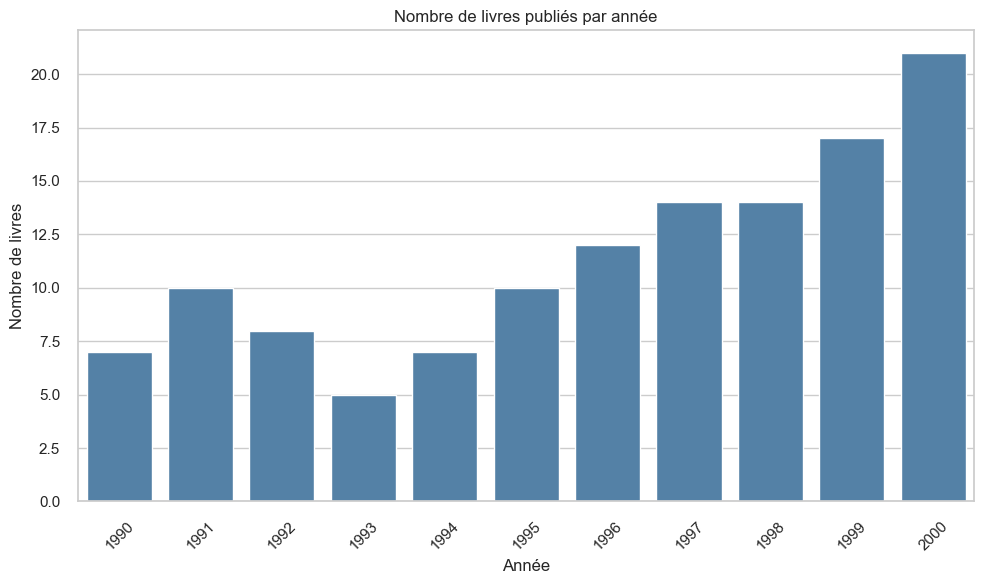

In [17]:
#Nombre de livres publiés par année
plt.figure()
sns.countplot(data=df, x='Année de publication', order=sorted(df['Année de publication'].unique()),color='steelblue')
plt.xticks(rotation=45)
plt.title("Nombre de livres publiés par année")
plt.xlabel("Année")
plt.ylabel("Nombre de livres")
plt.tight_layout()
plt.savefig("nbdeslivresparannee.png", dpi=300)
plt.show()

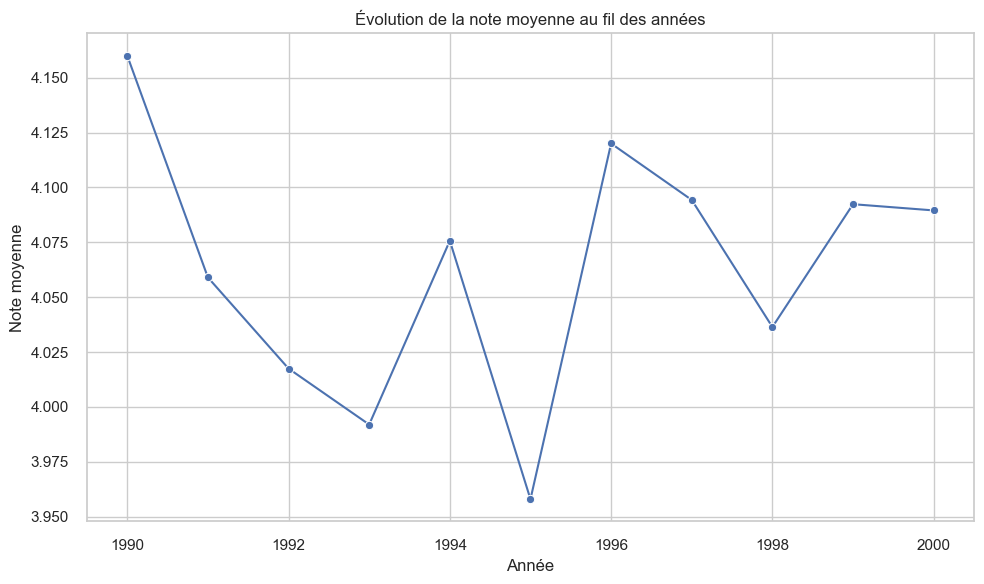

In [19]:
#Évolution de la note moyenne au fil des années
plt.figure()
df_grouped = df.groupby("Année de publication")["Note moyenne"].mean().reset_index()
sns.lineplot(data=df_grouped, x='Année de publication', y='Note moyenne', marker='o')
plt.title("Évolution de la note moyenne au fil des années")
plt.xlabel("Année")
plt.ylabel("Note moyenne")
plt.tight_layout()
plt.savefig("notemoyenneparannee.png", dpi=300)
plt.show()

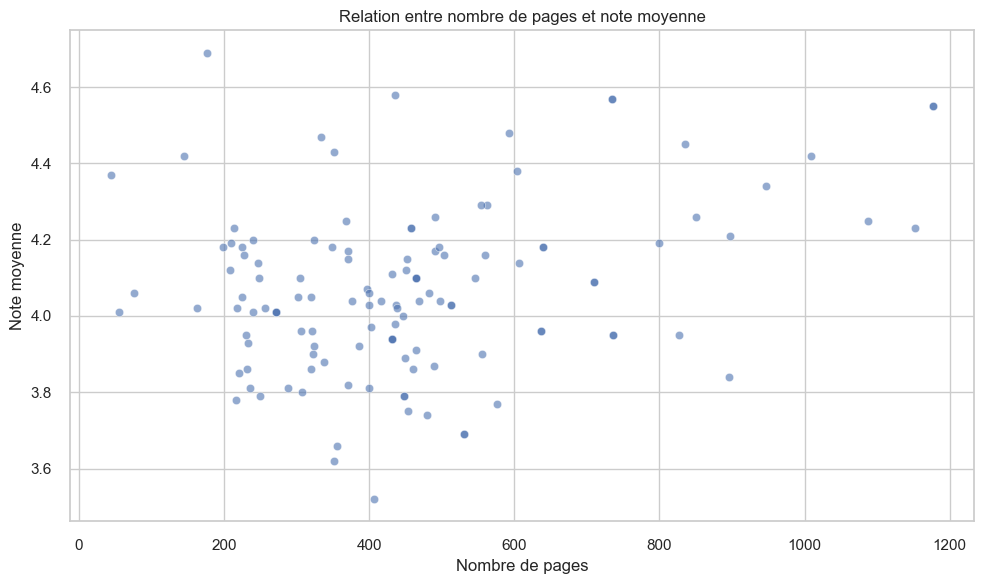

In [20]:
#Relation entre nombre de pages et note moyenne
plt.figure()
sns.scatterplot(data=df, x="Pages", y="Note moyenne", alpha=0.6)
plt.title("Relation entre nombre de pages et note moyenne")
plt.xlabel("Nombre de pages")
plt.ylabel("Note moyenne")
plt.tight_layout()
plt.savefig("nbdespagesvslanotemoyenne.png", dpi=300)
plt.show()

In [21]:
print(genre_df)

                        Genre  Count
1                     fiction    297
0                     fantasy    189
81         historical-fiction    111
70               contemporary     82
5                   audiobook     82
...                       ...    ...
1077                kiddy-lit      1
1076  journey-not-destination      1
1075            growing-pains      1
1074                   poetry      1
2004  verrisse-enttäuschungen      1

[2005 rows x 2 columns]


In [24]:
### Extraire les genres et les normaliser (tout en minuscules)
genres = []
for genre_list in df_csv['Genres']:
    # Convertir chaque genre en minuscules pour éviter les doublons
    genres.extend([genre.lower() for genre in genre_list if genre.lower() != "favorites"])

# Compter les occurrences de chaque genre
genre_counts = Counter(genres)

# Convertir en DataFrame pour une manipulation plus facile
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Trier par le nombre d'occurrences
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Afficher les 10 genres les plus populaires
top_genres = genre_df.head(10)
print(top_genres)

   Genre  Count
1      '  49820
9         25444
8      ,  24410
3      a  23583
12     o  22853
10     i  22344
15     e  21195
22     -  20119
13     r  18682
5      t  18440


In [25]:
# Liste des genres les plus fréquents (en minuscules pour la correspondance)
top_genres = ['fiction', 'fantasy', 'audiobook', 'historical-fiction', 
              'contemporary', 'adult', 'romance', 'historical', 
              'owned', 'non-fiction']

# 1. Convertir les genres en minuscules et exploser le dataframe
exploded_df = df_csv.copy()
exploded_df['Genres'] = exploded_df['Genres'].apply(lambda x: [g.lower() for g in x])
exploded_df = exploded_df.explode('Genres')

# 2. Filtrer pour garder seulement les genres top et calculer la moyenne
result_df = exploded_df[exploded_df['Genres'].isin(top_genres)]\
    .groupby('Genres')['Note moyenne']\
    .agg(['mean', 'count'])\
    .rename(columns={'mean': 'Note moyenne', 'count': 'Nombre de livres'})\
    .sort_values('Note moyenne', ascending=False)

# 3. Afficher le résultat
print(result_df)

Empty DataFrame
Columns: [Note moyenne, Nombre de livres]
Index: []


<span style="color:red">Étude des tendances de lecture à travers les décennies</span><br>

In [28]:
#Ajout de la colonne decennie au data frame contenant tous les livres
# Liste des décades dans l'ordre voulu (du plus récent au plus ancien)
decades = ['2020s'] * 100 + ['2010s'] * 100 + ['2000s'] * 100 + ['1990s'] * 100 + ['1980s'] * 100
df_csv['decennie'] = decades

In [29]:
df_csv.shape[1]

7

In [31]:
print(df_csv)

                                 Titre  Année de publication  Pages  \
0    The Invisible Life of Addie LaRue                  2020    448   
1        The House in the Cerulean Sea                  2020    394   
2                    Project Hail Mary                  2021    476   
3                 The Midnight Library                  2020    288   
4                 I'm Glad My Mom Died                  2022    320   
..                                 ...                   ...    ...   
495        Homicidal Psycho Jungle Cat                  1994    176   
496                  One for the Money                  1994    320   
497                          The Beach                  1996    436   
498              We Were the Mulvaneys                  1996    454   
499                         Underworld                  1997    827   

     Nombre de lecteurs  Note moyenne  \
0               1298512          4.18   
1                793548          4.39   
2                745166 

In [39]:
print(df_csv['decennie'].unique())
print(df_csv['decennie'].value_counts())

['2020s' '2010s' '2000s' '1990s' '1980s']
decennie
2020s    100
2010s    100
2000s    100
1990s    100
1980s    100
Name: count, dtype: int64


In [41]:
# Regrouper par décennie et calculer la moyenne du nombre de votes
popularite_par_decennie = df_csv.groupby('decennie')['Nombre de lecteurs'].mean().sort_index()

# Affichage
popularite_par_decennie

decennie
1980s     648730.44
1990s    1166135.26
2000s    1166134.76
2010s     887037.66
2020s     516925.58
Name: Nombre de lecteurs, dtype: float64

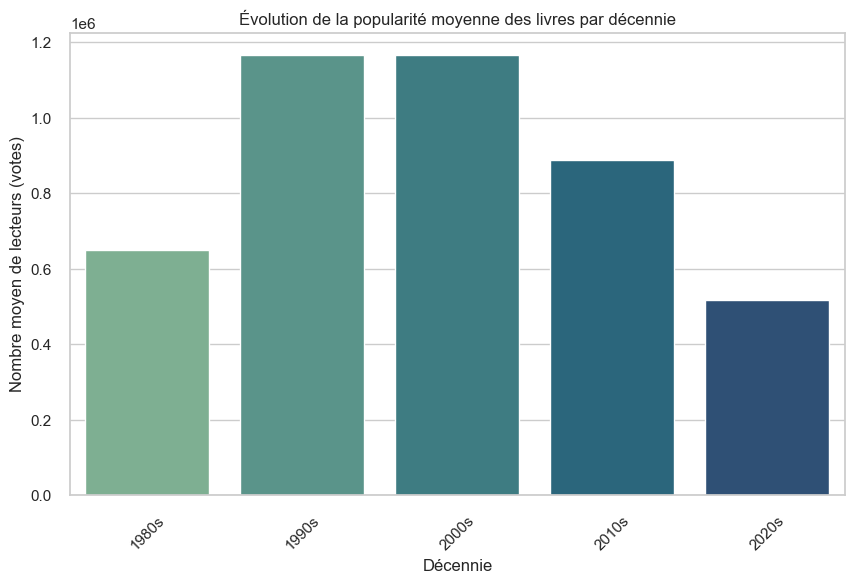

In [43]:
sns.barplot(
    x=popularite_par_decennie.index,
    y=popularite_par_decennie.values,
    hue=popularite_par_decennie.index,
    palette='crest',
    legend=False
)
plt.title("Évolution de la popularité moyenne des livres par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre moyen de lecteurs (votes)")
plt.xticks(rotation=45)
plt.savefig("popularite_par_decennie.png", dpi=300)

plt.show()

In [45]:
#faire avec la médiane au lieu de la moyenne afin d'eviter le biais causé par la publication des livres tres populaires
mediane_popularite_par_decennie = df_csv.groupby('decennie')['Nombre de lecteurs'].median().sort_index()
# Affichage
mediane_popularite_par_decennie

decennie
1980s    313233.5
1990s    659315.0
2000s    659313.5
2010s    587532.5
2020s    275426.5
Name: Nombre de lecteurs, dtype: float64

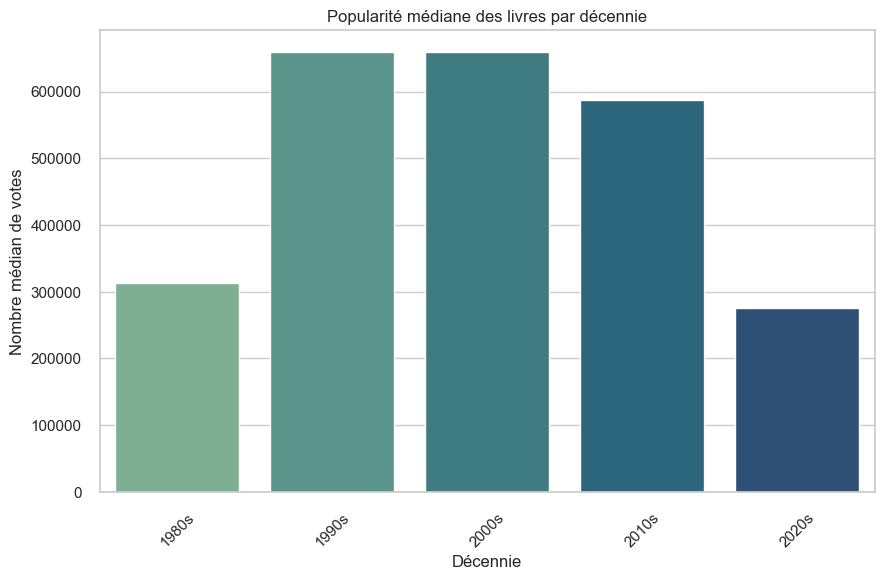

In [47]:
 sns.barplot(
    x=mediane_popularite_par_decennie.index,
    y=mediane_popularite_par_decennie.values,
    hue=mediane_popularite_par_decennie.index,
    palette='crest',
    legend=False
)
plt.title("Popularité médiane des livres par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre médian de votes")
plt.xticks(rotation=45)
plt.savefig("medianepopularite_par_decennie.png", dpi=300)
plt.show()

<span style="color:purple">Visualisation avec une boxplot pour voir la dispersion des nombre des lecteurs par décennies</span><br>

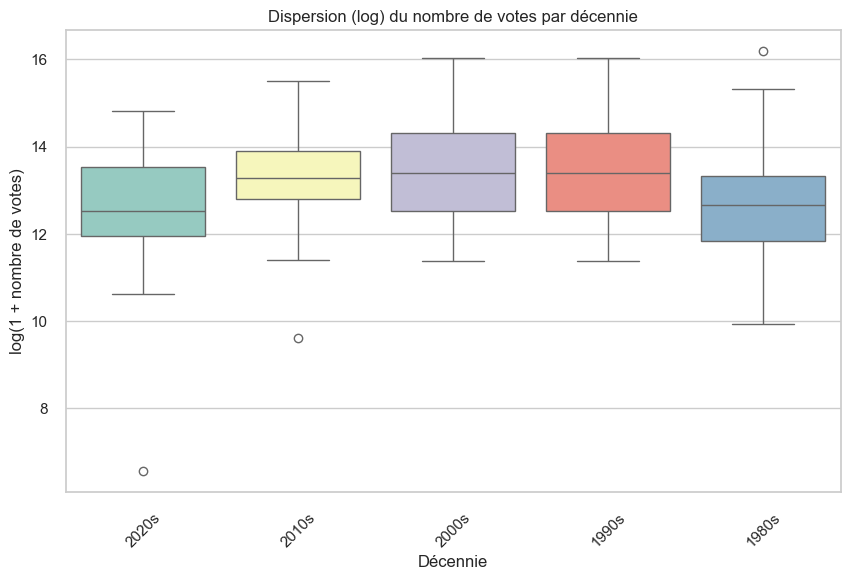

In [50]:
#On applique une transformation logarithmique car les valeurs varient fortement

# Ajouter une colonne log(num_ratings) pour visualiser correctement
df_csv['log_votes'] = np.log1p(df_csv['Nombre de lecteurs'])

sns.boxplot(data=df_csv, x='decennie', y='log_votes', hue='decennie', palette='Set3', legend=False)
plt.title("Dispersion (log) du nombre de votes par décennie")
plt.xlabel("Décennie")
plt.ylabel("log(1 + nombre de votes)")
plt.xticks(rotation=45)
plt.savefig("logdispersiondesvotes.png", dpi=300)
plt.show()


In [52]:
#Analyse  de d'evaluation en moyenne des livres a travers des decennies
note_en_moyenne_par_decennie=df_csv.groupby('decennie')['Note moyenne'].mean().sort_index()
note_en_moyenne_par_decennie

decennie
1980s    4.0671
1990s    4.0747
2000s    4.0747
2010s    4.1595
2020s    4.1817
Name: Note moyenne, dtype: float64

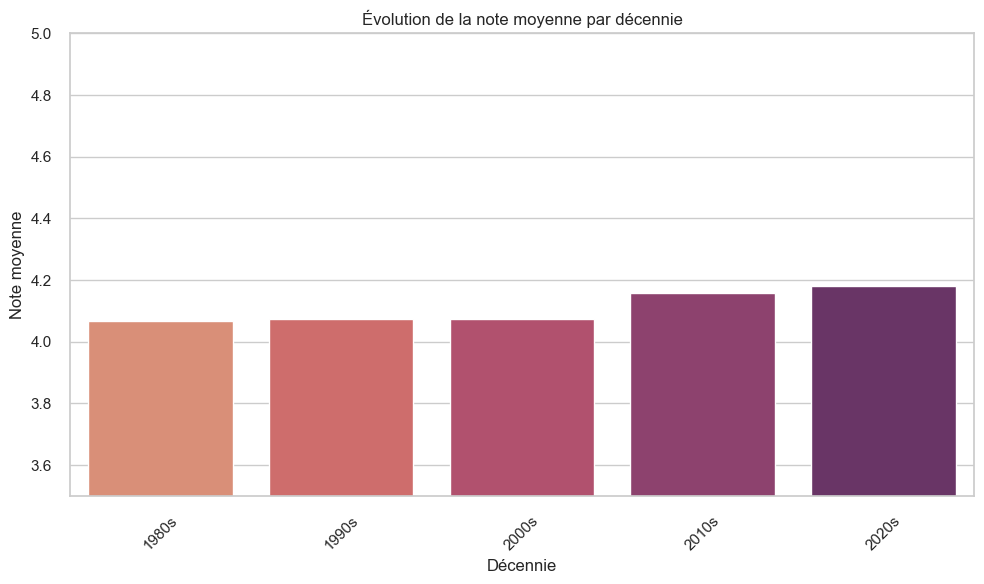

In [54]:
sns.barplot(
    x=note_en_moyenne_par_decennie.index,
    y=note_en_moyenne_par_decennie.values,
    hue=note_en_moyenne_par_decennie.index,
    palette='flare',
    legend=False
)
plt.title("Évolution de la note moyenne par décennie")
plt.xlabel("Décennie")
plt.ylabel("Note moyenne")
plt.ylim(3.5, 5)  # Notes Goodreads varient généralement entre 3 et 5
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("succespardecennie.png", dpi=300)
plt.show()

In [56]:
#En utilisant la médiane
note_par_decennie_mediane=df_csv.groupby('decennie')['Note moyenne'].median().sort_index()
note_par_decennie_mediane

decennie
1980s    4.050
1990s    4.040
2000s    4.040
2010s    4.135
2020s    4.190
Name: Note moyenne, dtype: float64

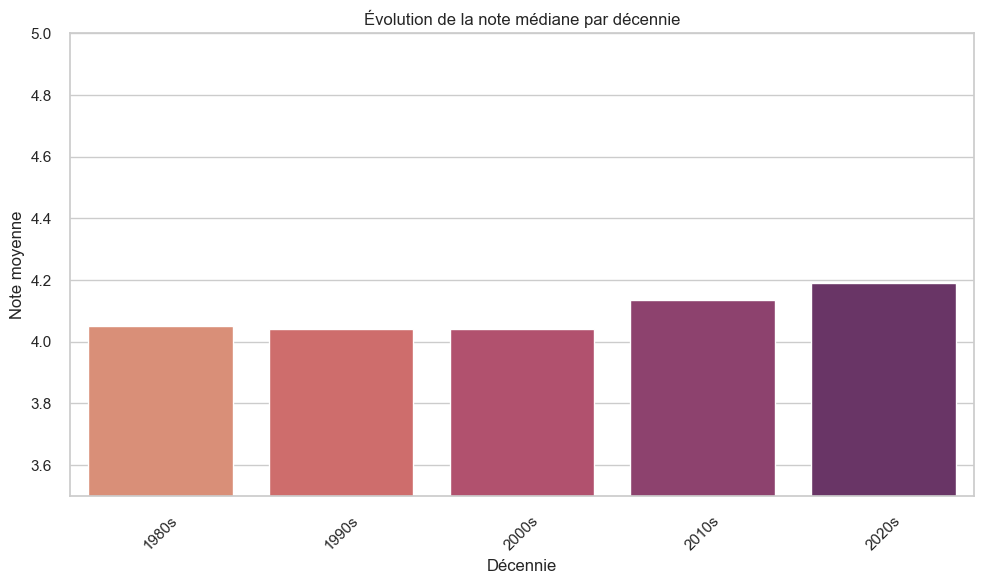

In [58]:
sns.barplot(
    x=note_par_decennie_mediane.index,
    y=note_par_decennie_mediane.values,
    hue=note_par_decennie_mediane.index,
    palette='flare',
    legend=False
)
plt.title("Évolution de la note médiane par décennie")
plt.xlabel("Décennie")
plt.ylabel("Note moyenne")
plt.ylim(3.5, 5)  # Notes Goodreads varient généralement entre 3 et 5
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("succesmedianepardecennie.png", dpi=300)
plt.show()

> **Notes médianes par décennie :**  
> Les notes sont très stables dans le temps, autour de 4.1 à 4.3, ce qui est élevé sur Goodreads.  
> Contrairement à la popularité qui varie beaucoup, l’appréciation des livres reste constante.  
> Cela s’explique sans doute par le fait que seuls les livres les plus aimés figurent dans ces classements.


<span style="color:purple">Visualisation avec une boxplot pour voir la dispersion de la note en moyenne par décennies</span><br>

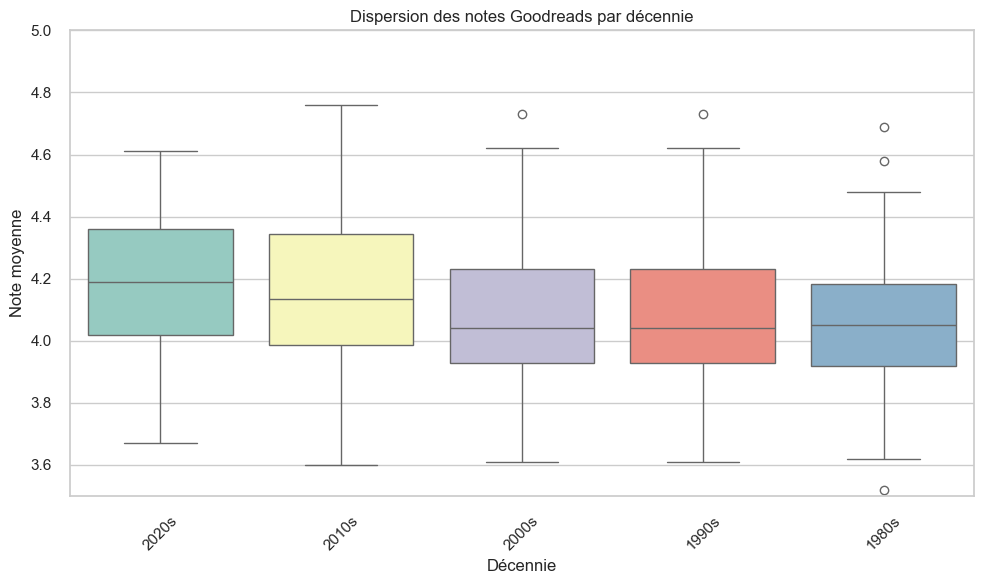

In [60]:
sns.boxplot(data=df_csv, x='decennie', y='Note moyenne', hue='decennie', palette='Set3', legend=False)
plt.title("Dispersion des notes Goodreads par décennie")
plt.xlabel("Décennie")
plt.ylabel("Note moyenne")
plt.ylim(3.5, 5.0)  # Échelle adaptée à Goodreads
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("dispersiondesnotespardecennie.png", dpi=300)
plt.show()

> **Notes médianes par décennie :**  
> Les notes sont très stables dans le temps, autour de 4.1 à 4.3, ce qui est élevé sur Goodreads.  
> Contrairement à la popularité qui varie beaucoup, l’appréciation des livres reste constante.  
> Cela s’explique sans doute par le fait que seuls les livres les plus aimés figurent dans ces classements.


<span style="font-style:italic; font-size:24px; color:darkslateblue;">
Boxplots côte à côte : note vs popularité (log)
</span>

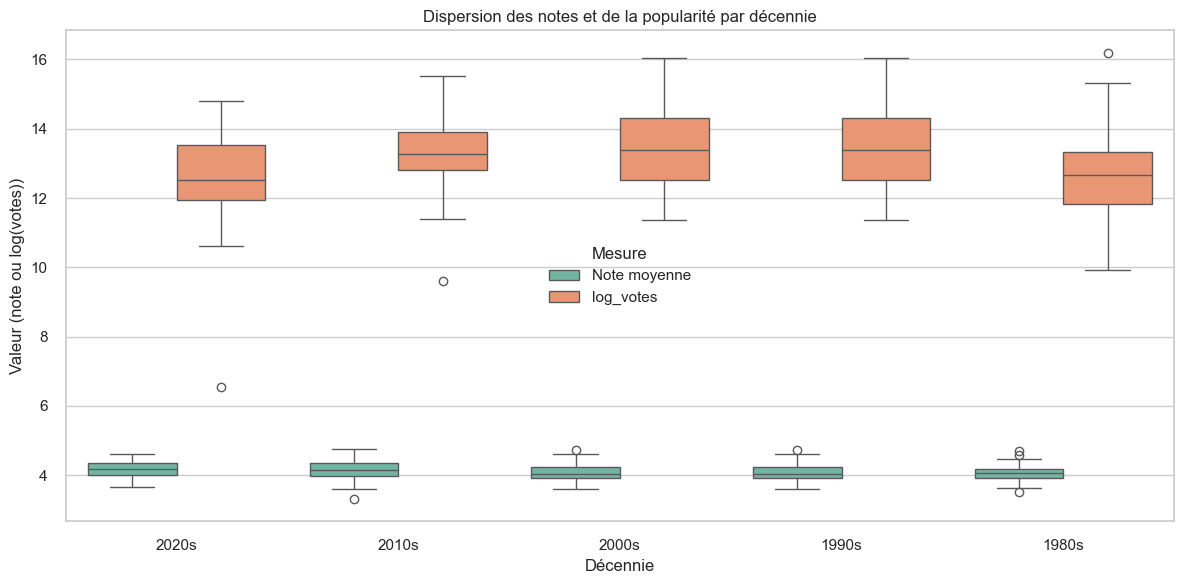

In [62]:

# Transformer le DataFrame en format long (melt) parce que les deux données sont dans les echelles differentes
df_long = pd.melt(
    df_csv,
    id_vars=['decennie'],
    value_vars=['Note moyenne', 'log_votes'],
    var_name='Variable',
    value_name='Valeur'
)

# Tracer le boxplot combiné
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='decennie', y='Valeur', hue='Variable', palette='Set2')

plt.title("Dispersion des notes et de la popularité par décennie")
plt.xlabel("Décennie")
plt.ylabel("Valeur (note ou log(votes))")
plt.legend(title='Mesure')
plt.tight_layout()
plt.savefig("dispersiondesnotestelecteursboxplot.jpg", dpi=300)
plt.show()


> **Notes vs Popularité par décennie :**  
> Les notes restent concentrées autour de 4.1–4.3, tandis que la popularité (log des votes) montre une plus grande variabilité.  
> Ce graphique permet de visualiser la stabilité de l’appréciation par rapport à l’évolution de la visibilité des livres.


<span style="font-style:italic; font-size:24px; color:darkslateblue;">
Clustering selon les genres
</span>

In [99]:
#la variable explicative 'Genres' est un liste de plusieurs genres,donc on doit extraire le genre principal pour le clustering
df_csv['genre_principal'] = df_csv['Genres'].apply(lambda x: eval(x)[0] if isinstance(x, str) else 'Inconnu')
#transformer les genres en colonnes binaires
genre_dummies = pd.get_dummies(df_csv['genre_principal'], prefix='genre')

In [101]:
#fusion avec des variables numériques
features_numeriques=df_csv[['Note moyenne', 'log_votes']]
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(features_numeriques)
# Concaténer avec les genres encodés
from numpy import hstack
X = np.hstack([numerical_scaled, genre_dummies.values])

In [103]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df_csv['cluster'] = kmeans.fit_predict(X)

In [109]:
 df_csv.groupby('cluster')['genre_principal'].value_counts(normalize=True)

cluster  genre_principal   
0        Fiction               0.658915
         Historical Fiction    0.085271
         Fantasy               0.054264
         Mystery               0.031008
         Young Adult           0.031008
         Horror                0.023256
         Nonfiction            0.023256
         Romance               0.023256
         Food                  0.015504
         Memoir                0.015504
         Science Fiction       0.015504
         Chick Lit             0.007752
         Thriller              0.007752
         Travel                0.007752
1        Fiction               0.424242
         Fantasy               0.181818
         Young Adult           0.143939
         Nonfiction            0.113636
         Mystery               0.045455
         Romance               0.037879
         Contemporary          0.015152
         Dystopia              0.015152
         Enemies To Lovers     0.007576
         Historical Fiction    0.007576
         Sci

In [88]:
### Afficher 25 exemples de livres pour chaque cluster
for c in df_csv['cluster'].unique():
    print(f"\nExemples pour le cluster {c} :")
    display(df_csv[df_csv['cluster'] == c][['Titre', 'genre_principal', 'Note moyenne', 'Nombre de lecteurs']].head(50))



Exemples pour le cluster 3 :


,Titre,genre_principal,Note moyenne,Nombre de lecteurs
0,The Invisible Life of Addie LaRue,Fantasy,4.18,1298512
1,The House in the Cerulean Sea,Fantasy,4.39,793548
2,Project Hail Mary,Science Fiction,4.50,745166
4,I'm Glad My Mom Died,Nonfiction,4.45,1261536
5,Fourth Wing,Romantasy,4.58,2715838
8,Lessons in Chemistry,Fiction,4.28,1578078
10,House of Earth and Blood,Romance,4.46,928326
11,A ​Court of Silver Flames,Fantasy,4.46,1705361
21,Remarkably Bright Creatures,Fiction,4.38,896055
23,Heartstopper: Volume Three,Graphic Novels,4.55,476500



Exemples pour le cluster 1 :


,Titre,genre_principal,Note moyenne,Nombre de lecteurs
3,The Midnight Library,Fiction,3.99,2140879
6,The Ballad of Songbirds and Snakes,Dystopia,3.98,923022
9,"Tomorrow, and Tomorrow, and Tomorrow",Fiction,4.14,1163161
12,The Vanishing Half,Fiction,4.13,808907
14,Beach Read,Contemporary,3.99,1407161
16,The Love Hypothesis,Contemporary,4.12,1599545
17,Malibu Rising,Fiction,4.03,1171621
18,The Inheritance Games,Mystery,4.14,924291
19,Book Lovers,Romance,4.12,1340581
29,The Thursday Murder Club,Mystery,3.87,617113



Exemples pour le cluster 2 :


,Titre,genre_principal,Note moyenne,Nombre de lecteurs
7,Piranesi,Fantasy,4.22,362927
13,My Dark Vanessa,Fiction,4.10,380503
15,Babel,Fantasy,4.17,341485
20,The Four Winds,Historical Fiction,4.30,828676
22,Under the Whispering Door,Fantasy,4.13,280073
24,American Dirt,Fiction,4.37,632920
25,Carrie Soto Is Back,Fiction,4.20,621980
26,Crying in H Mart,Memoir,4.25,513746
28,Divine Rivals,Romance,4.17,612891
32,Hamnet,Historical Fiction,4.19,295471



Exemples pour le cluster 0 :


,Titre,genre_principal,Note moyenne,Nombre de lecteurs
27,Mexican Gothic,Horror,3.67,401998
31,Sea of Tranquility,Fiction,4.07,269756
34,A Deadly Education,Fantasy,3.95,197747
36,Klara and the Sun,Fiction,3.74,388316
41,Bell Hammers,Historical Fiction,4.15,696
45,One of Us Is Next,Mystery,3.90,261773
53,The Glass Hotel,Fiction,3.69,185094
59,Transcendent Kingdom,Fiction,4.11,155661
60,These Violent Delights,Historical Fiction,3.82,159810
69,Writers & Lovers,Fiction,4.00,155633


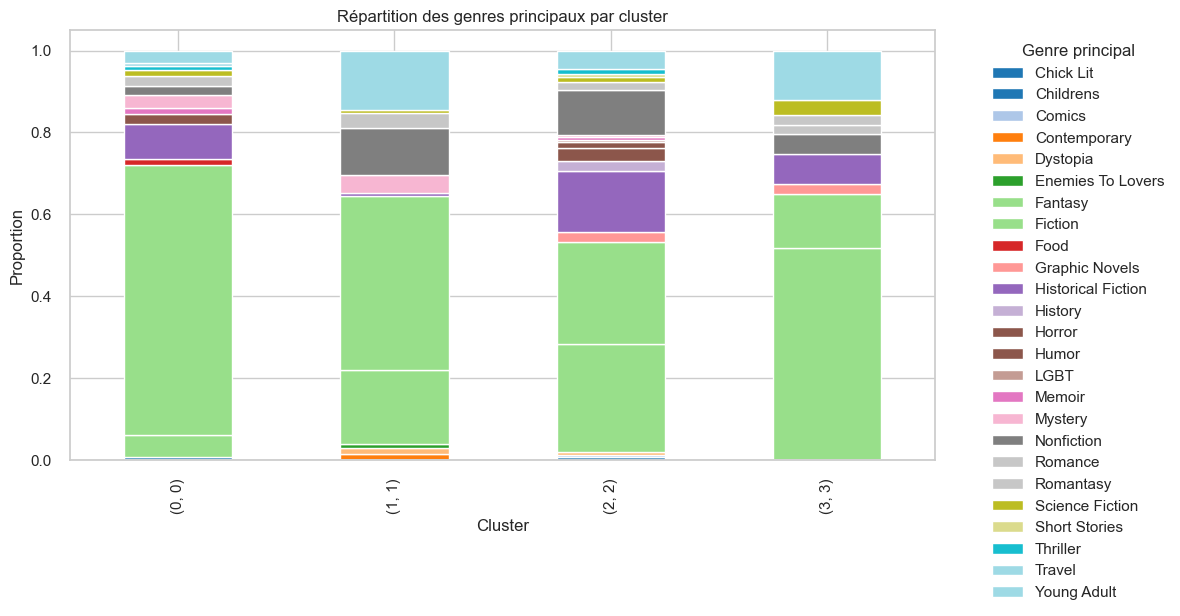

In [82]:
### genre_clusters = df_csv.groupby(['cluster', 'genre_principal']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack().fillna(0)

# Tracé
genre_clusters.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title("Répartition des genres principaux par cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.legend(title="Genre principal", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("clusters_par_genres.png", dpi=500)
plt.show()

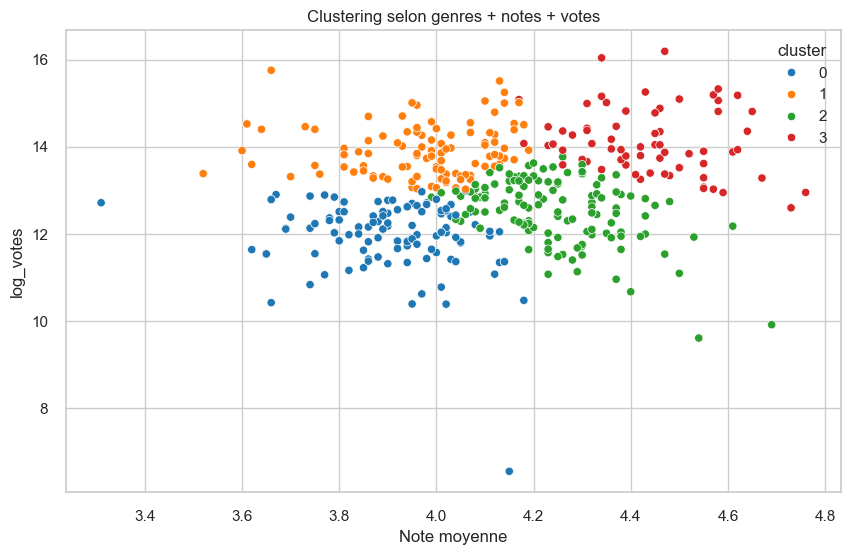

In [84]:
#on inclu des autres variables numeriques
sns.scatterplot(data=df_csv, x='Note moyenne', y='log_votes', hue='cluster', palette='tab10')
plt.title("Clustering selon genres + notes + votes")
plt.show()

In [86]:
# Statistiques descriptives par cluster
df_csv.groupby('cluster')[['Note moyenne', 'log_votes']].agg(['mean', 'median', 'min', 'max', 'count'])

Note moyenne                           log_votes             \
                mean median   min   max count       mean     median   
cluster                                                               
0           3.905891  3.920  3.31  4.18   129  12.024898  12.128624   
1           3.960606  3.990  3.52  4.19   132  13.955280  13.853072   
2           4.232500  4.225  3.99  4.69   156  12.593520  12.742144   
3           4.443855  4.450  4.17  4.76    83  14.216170  14.063181   

                                     
               min        max count  
cluster                              
0         6.546785  12.992036   129  
1        13.028428  15.759505   132  
2         9.608042  13.769288   156  
3        12.600679  16.195408    83

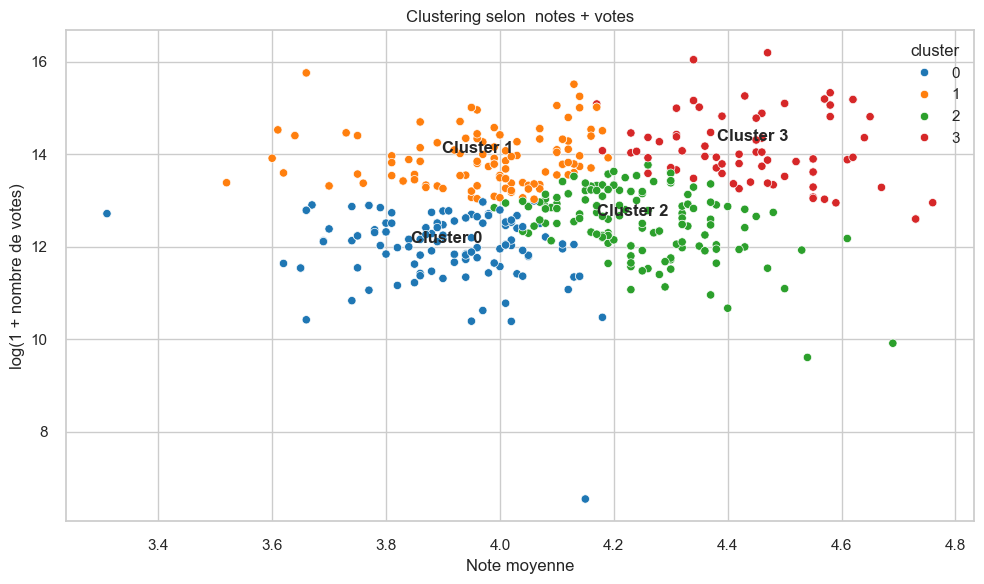

In [88]:
# Calculer le centre de chaque cluster
cluster_centers = df_csv.groupby('cluster')[['Note moyenne', 'log_votes']].mean().reset_index()

# Scatterplot de base
sns.scatterplot(data=df_csv, x='Note moyenne', y='log_votes', hue='cluster', palette='tab10')

# Ajouter les centres
for _, row in cluster_centers.iterrows():
    plt.text(row['Note moyenne'], row['log_votes'], f"Cluster {int(row['cluster'])}", 
             fontsize=12, weight='bold', ha='center', va='bottom')

plt.title("Clustering selon  notes + votes")
plt.xlabel("Note moyenne")
plt.ylabel("log(1 + nombre de votes)")
plt.tight_layout()
plt.savefig("clusters_par_tout.jpg", dpi=300)
plt.show()
